In [ ]:
## bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
#leitura do dataset
data = pd.read_csv("Maternal Health Risk Data Set.csv")
data.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


O dataset possui 7 atribuitos no total, sendo eles:


*   **Age**: Idade da mulher;
*   **SystolicBP**: Valor superior da pressão arterial em mmHg;
*   **DiastolicBP**: Valor mais baixo da pressão arterial em mmHg;
*   **BS**: Os níveis de glicose no sangue, em termos de uma concentração molar (mmol/L);
*   **BodyTemp**: Temperatura corporal da mulher (em °F);
*   **HeartRate**: Uma frequência cardíaca normal em repouso em batimentos por minuto;
*   **Risk Level**: Nível de intensidade de risco previsto durante a gravidez.



Os tipos dos dados são: Age: inteiro, SystolicBP: inteiro, DiastolicBP: inteiro, BS: float, BodyTemp: float, HeartRate: inteiro, RiskLevel: objeto.

As informações podem ser observadas abaixo:

In [77]:
data.dtypes

Age              int64
SystolicBP       int64
DiastolicBP      int64
BS             float64
BodyTemp       float64
HeartRate        int64
RiskLevel       object
dtype: object

In [ ]:
# verificação da quantidade de exemplos e atributos preditores
columns = len(data.axes[1])
rows = len(data.axes[0])

print("Quantidade de exemplo:",rows)
print("Quantidade de atributos preditores:",columns-1,)
print("Atributos preditores:",data.axes[1][0], data.axes[1][1], data.axes[1][2], data.axes[1][3], data.axes[1][4], data.axes[1][5])
print("Quantidade de atributos alvo:", columns-(columns-1))
print("Atributo alvo:",data.axes[1][6])

Quantidade de exemplo: 1014
Quantidade de atributos preditores: 6
Atributos preditores: Age SystolicBP DiastolicBP BS BodyTemp HeartRate
Quantidade de atributos alvo: 1
Atributo alvo: RiskLevel


Checando se existem dados faltosos no dataset:

In [ ]:
data.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

Verificando quantos exemplos existem para cada classe do atributo alvo:

In [ ]:
data['RiskLevel'].value_counts()

low risk     406
mid risk     336
high risk    272
Name: RiskLevel, dtype: int64

In [92]:
def plot_hist_box(data, col):
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))

    sns.histplot(data=data, x=col, kde=True, ax=ax[0])
    sns.boxplot(data=data, x=col, ax=ax[1])
    ax[0].set_title(f"Histograma de {col}")
    ax[1].set_title(f"Boxplot de {col}")

    plt.show()

Abaixo pode-se observar alguns dados gerais sobre o dataset:

In [89]:
data.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


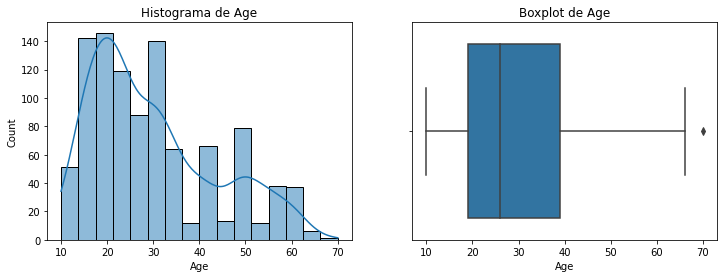

In [93]:
plot_hist_box(data, 'Age')

É possível observar que o atributo Age possui sua mediana em torno de 26 anos e que existem muitos exemplos entre os valores de 20 até 35 anos, enquanto valores maiores e menores que esse intervalo possuem poucos exemplos.

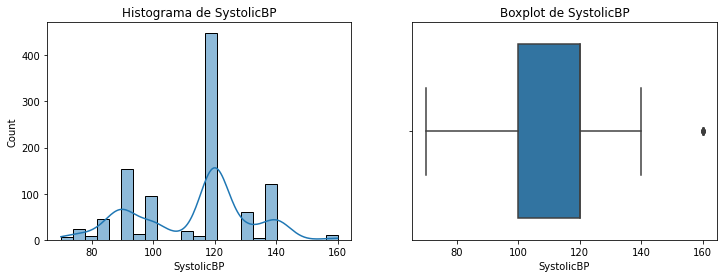

In [80]:
plot_hist_box(data, 'SystolicBP')

Ao examinar os gráficos acima, pode-se afirmar que a mediana do atributo SystolicBP é em torno de 120, com uma grande quantidade de exemplos na faixa de 100 até 120, além de verificar um pequeno grupo de exemplos entre os valores de 80 até 100, e entre 130 até 140. É também visível um *outlier* no valor 160.

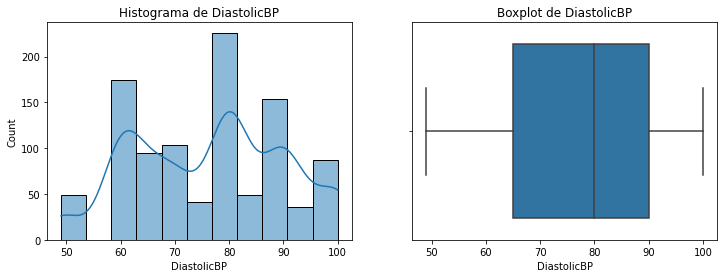

In [81]:
plot_hist_box(data, 'DiastolicBP')

O atributo DiastolicBP possui sua mediana em 80, com exemplos relativamente bem distribuídos, principalmente na faixa entre 65 e 90.

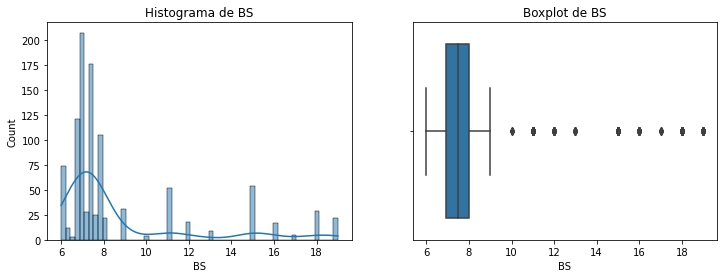

In [82]:
plot_hist_box(data, 'BS')

Diferente do atributo DiastolicBP, o atributo BS possui exemplos dispersos, com sua grande maioria entre os valores de 7 e 8, sua mediana é em torno de 7,5. É bastante visível os diversos *outliers* existentes neste atributo.

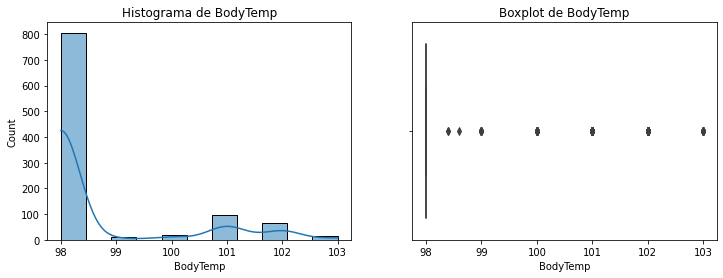

In [83]:
plot_hist_box(data, 'BodyTemp')

É notável a dispariedade dos valores dos exemplos do atributo BodyTemp, com sua mediana e a maioria dos exemplos com valor 98, e os outro valores sendo considerados quase *outliers*, apesar de estarem próximo do valor 98.

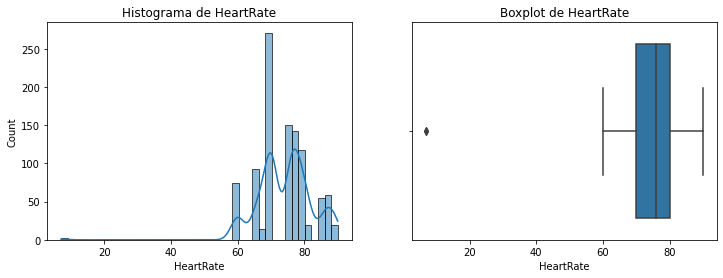

In [84]:
plot_hist_box(data, 'HeartRate')

Por último, o atributo HeartRate possui a maioria dos seus exemplos entre 70 e 80, e sua mediana é de aproximadamente 75. É possível obervar a existência de um *outlier* próximo do valor 10.